In [1]:
# Import 
import pandas as pd
from IPython.display import display
from analysis_pipeline import (
    run_data_pipeline, 
    run_training_pipeline, 
    generate_comparative_visuals
)

D:\INTELLIGENT SYSTEMS\env-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Konfigurasi Proyek
APPS_TO_ANALYZE = [
    {'id': 'com.tinder', 'name': 'Tinder'},
    {'id': 'com.badoo.mobile', 'name': 'Badoo'},
    {'id': 'com.p1.mobile.putong', 'name': 'Tantan'}
]
TARGET_REVIEW_COUNT = 10000  # Jumlah data per aplikasi
TRAINING_EPOCHS = 4          # Jumlah epoch untuk fine-tuning


Memulai Proses Data untuk: Tinder

Start crawling data aplikasi: com.tinder
Terkumpul: 200 ulasan
Terkumpul: 400 ulasan
Terkumpul: 600 ulasan
Terkumpul: 800 ulasan
Terkumpul: 1000 ulasan
Terkumpul: 1200 ulasan
Terkumpul: 1400 ulasan
Terkumpul: 1600 ulasan
Terkumpul: 1800 ulasan
Terkumpul: 2000 ulasan
Terkumpul: 2200 ulasan
Terkumpul: 2400 ulasan
Terkumpul: 2600 ulasan
Terkumpul: 2800 ulasan
Terkumpul: 3000 ulasan
Terkumpul: 3200 ulasan
Terkumpul: 3400 ulasan
Terkumpul: 3600 ulasan
Terkumpul: 3800 ulasan
Terkumpul: 4000 ulasan
Terkumpul: 4200 ulasan
Terkumpul: 4400 ulasan
Terkumpul: 4600 ulasan
Terkumpul: 4800 ulasan
Terkumpul: 5000 ulasan
Terkumpul: 5200 ulasan
Terkumpul: 5400 ulasan
Terkumpul: 5600 ulasan
Terkumpul: 5800 ulasan
Terkumpul: 6000 ulasan
Terkumpul: 6200 ulasan
Terkumpul: 6400 ulasan
Terkumpul: 6600 ulasan
Terkumpul: 6800 ulasan
Terkumpul: 7000 ulasan
Terkumpul: 7200 ulasan
Terkumpul: 7400 ulasan
Terkumpul: 7600 ulasan
Terkumpul: 7800 ulasan
Terkumpul: 8000 ulasan
Terkump

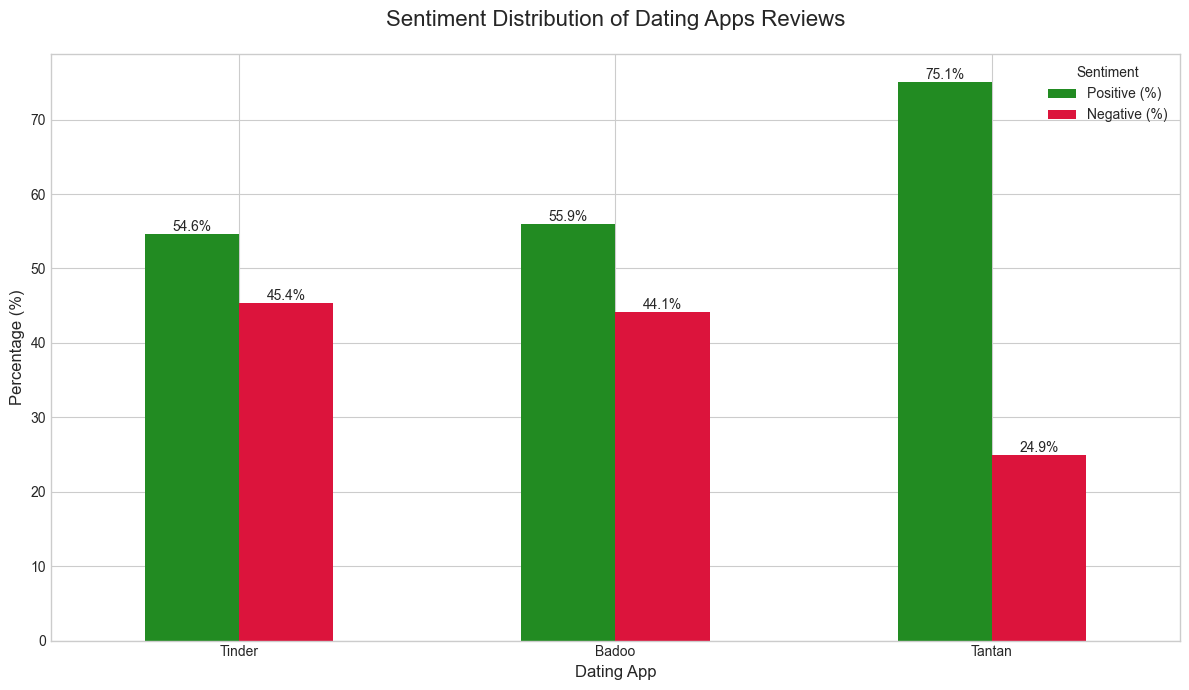

D:\INTELLIGENT SYSTEMS\analysis_pipeline.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Application', y='F1-Score (Macro)', data=df_f1, palette='plasma')


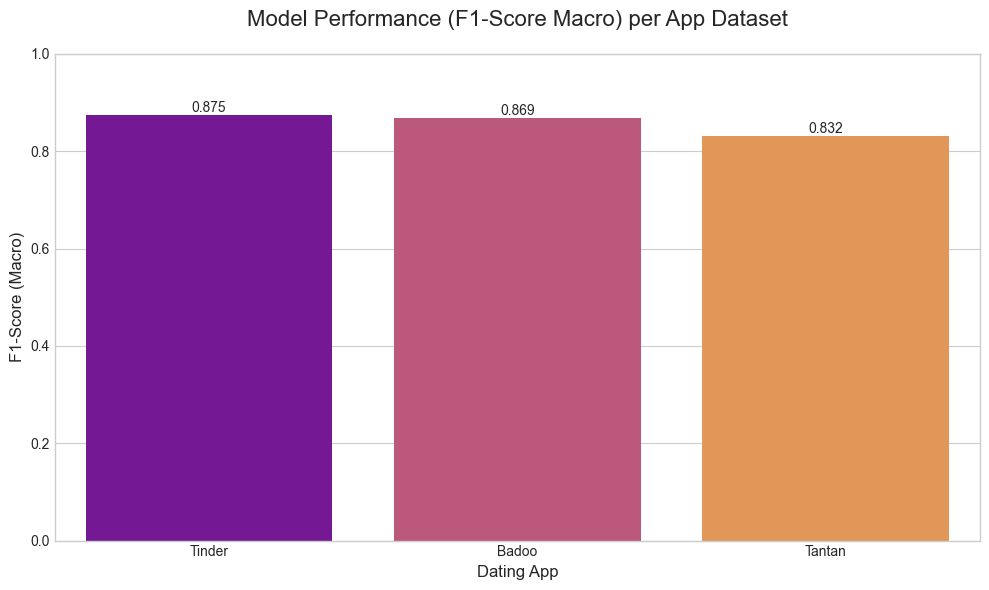

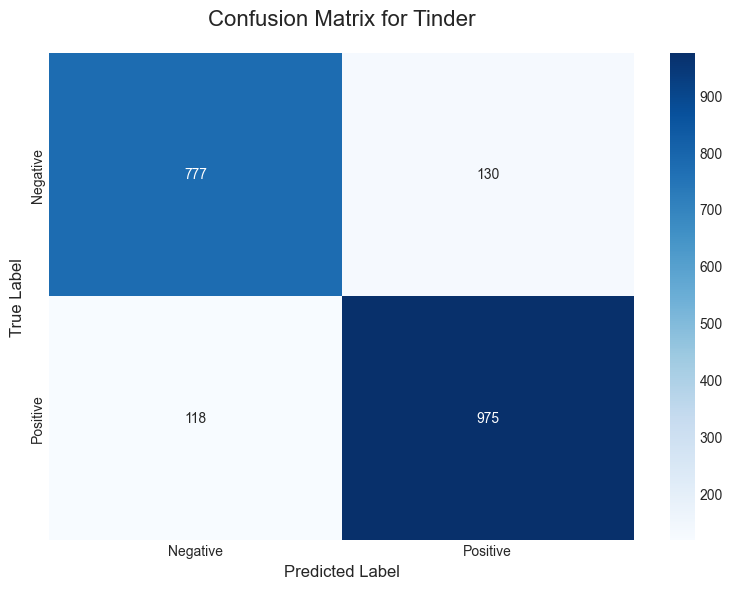

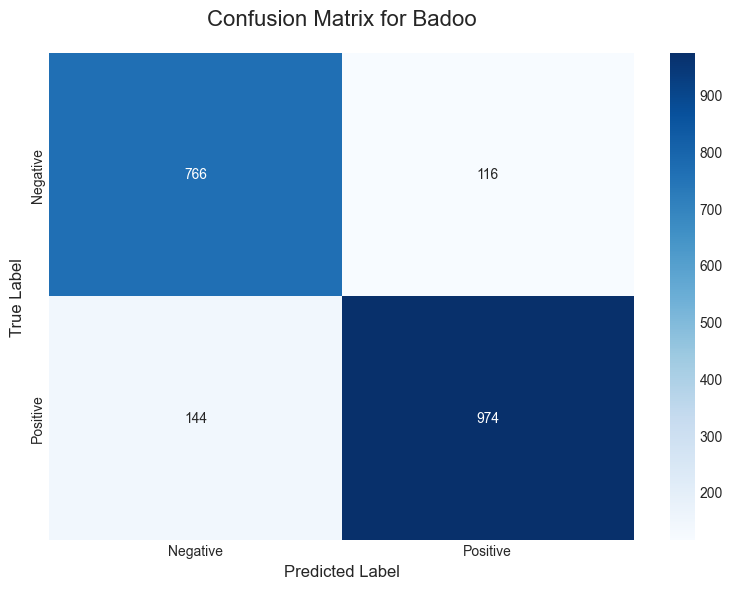

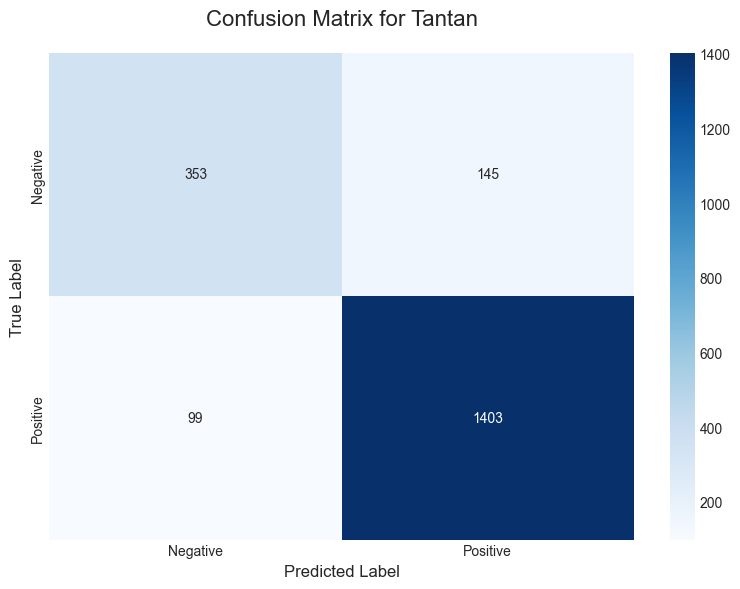

In [3]:
# Menjalankan Proyek
# Langkah A: Jalankan pipeline data
processed_data = run_data_pipeline(APPS_TO_ANALYZE, TARGET_REVIEW_COUNT)

# Langkah B: Jalankan pipeline training
evaluation_results = run_training_pipeline(processed_data, epochs=TRAINING_EPOCHS)

# Langkah C: Buat visualisasi perbandingan
generate_comparative_visuals(processed_data, evaluation_results)

In [4]:
# Visualisasi Hasil
final_results_list = []
for app_name, result in evaluation_results.items():
    if result.get('report_dict'):
        res_dict = {
            'Aplikasi': app_name,
            'Akurasi': result['accuracy'],
            'Presisi (Macro)': result['precision_macro'],
            'Recall (Macro)': result['recall_macro'],
            'F1-Score (Macro)': result['f1_macro'],
            'F1-Score (Positif)': result['report_dict']['Positif']['f1-score'],
            'F1-Score (Negatif)': result['report_dict']['Negatif']['f1-score']
        }
        final_results_list.append(res_dict)

df_results = pd.DataFrame(final_results_list).set_index('Aplikasi')

print(f"\n{'='*60}\n\033[1m Tabel Hasil \033[0m\n{'='*60}\n")
display(df_results.style.format("{:.3f}").background_gradient(cmap='viridis').set_caption("Tabel Perbandingan Kinerja Model"))


 Tabel Hasil 



,Akurasi,Presisi (Macro),Recall (Macro),F1-Score (Macro),F1-Score (Positif),F1-Score (Negatif)
Aplikasi,,,,,,
Tinder,0.876,0.875,0.874,0.875,0.887,0.862
Badoo,0.870,0.868,0.870,0.869,0.882,0.855
Tantan,0.878,0.844,0.821,0.832,0.920,0.743
